# Valutazione di una Random Forest per regressione

In questa esercitazione si addestra un modello `RandomForestRegressor` per valutarne le performance sul dataset __fetch_california_housing__ di sklearn sul task di predire il valore delle abitazioni.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import skew

In [2]:
data = fetch_california_housing()
X, y = data.data, data.target
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

## Preprocessing e analisi del dataset

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [5]:
eda = pd.DataFrame(data=X_train)
eda.columns = data.feature_names
eda['MedHouseVal'] = y_train
eda.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.880754,28.608285,5.435235,1.096685,1426.453004,3.096961,35.643149,-119.582290,2.071947
std,1.904294,12.602499,2.387375,0.433215,1137.056380,11.578744,2.136665,2.005654,1.156226
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000,0.149990
25%,2.566700,18.000000,4.452055,1.006508,789.000000,2.428799,33.930000,-121.810000,1.198000
50%,3.545800,29.000000,5.235874,1.049286,1167.000000,2.817240,34.260000,-118.510000,1.798500
75%,4.773175,37.000000,6.061037,1.100348,1726.000000,3.280000,37.720000,-118.010000,2.651250
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Plot della distribuzione del valore medio delle abitazioni.

Skewness: $s = \frac{\sum_i^N (X_i - \bar{X})^3}{(N-1) \cdot \sigma^3}$
misura l'asimmetria di una distribuzione

Text(0, 0.5, 'Frequency')

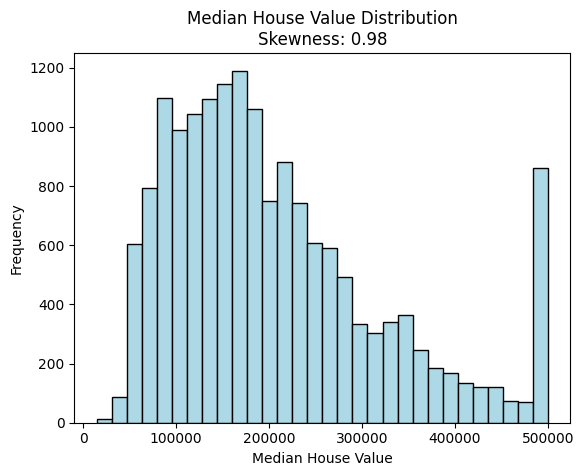

In [6]:
plt.hist(1e5*y_train, bins=30, color='lightblue', edgecolor='black')
plt.title(f'Median House Value Distribution\nSkewness: {skew(y_train):.2f}')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

## Implementazione del modello



n_estimators = 1 	 train mse: 0.2139 	 test mse: 0.5675
n_estimators = 2 	 train mse: 0.1164 	 test mse: 0.3979
n_estimators = 4 	 train mse: 0.0728 	 test mse: 0.3295
n_estimators = 8 	 train mse: 0.0525 	 test mse: 0.2922
n_estimators = 16 	 train mse: 0.0437 	 test mse: 0.2693
n_estimators = 32 	 train mse: 0.0394 	 test mse: 0.2609

Min test mse: 0.2609 for n_estimators = 32


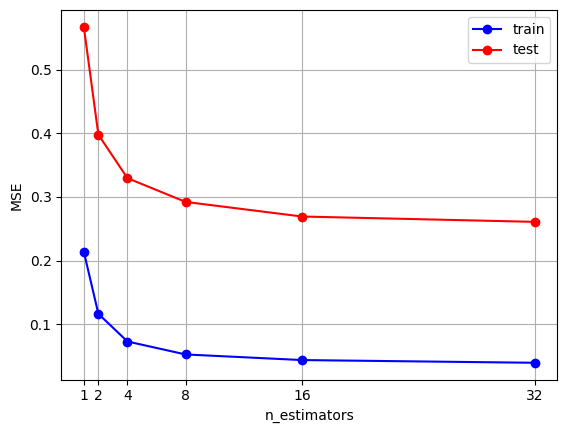

In [8]:
# Faccio un loop per vedere come variano le performance in base a n_estimators e visualizzare eventuale overfitting
n_estimators = np.array([1, 2, 4, 8, 16, 32])
hist_train_mse = []
hist_test_mse = []

for i, n in enumerate(n_estimators):
  model = RandomForestRegressor(n_estimators = n, random_state=42)
  model.fit(X_train, y_train)
  model_pred_train = model.predict(X_train)
  model_pred_test = model.predict(X_test)
  print(f"n_estimators = {n} \t train mse: {mean_squared_error(y_train, model_pred_train):.4f} \t test mse: {mean_squared_error(y_test, model_pred_test):.4f}")
  hist_train_mse.append(mean_squared_error(y_train, model_pred_train))
  hist_test_mse.append(mean_squared_error(y_test, model_pred_test))

plt.plot(n_estimators, hist_train_mse, c='b', marker='o', label='train')
plt.plot(n_estimators, hist_test_mse, c='r', marker='o', label='test')
plt.legend()
plt.xticks(n_estimators)
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.grid()

min_test_mse = np.array(hist_test_mse).min()
best_index = np.where( hist_test_mse == min_test_mse )
n_estimators_best = n_estimators[best_index]
print(f'\nMin test mse: {min_test_mse:.4f} for n_estimators = {n_estimators_best[0]}')

In [9]:
# Inizializzazione del modello con il miglior n_estimators
rf_regressor = RandomForestRegressor(n_estimators=n_estimators_best[0], random_state=42)
rf_regressor.fit(X_train, y_train)

# Predizioni
y_pred_test = rf_regressor.predict(X_test)

### Metriche di valutazione


In [10]:
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.3347
Mean Squared Error (MSE): 0.2609
Root Mean Squared Error (RMSE): 0.5108
R² Score: 0.8009


- Dalla mae si deduce che il costo medio predetto è circa $33k;
- Il valore del R^2 non è molto elevato, infatti il modello riesce a spiegare circa 80% della varianza; inoltre, questa informazione non è molto indicativa nel caso in cui ci sono relazioni non lineari oppure outliers.

### Scatter plot delle previsioni


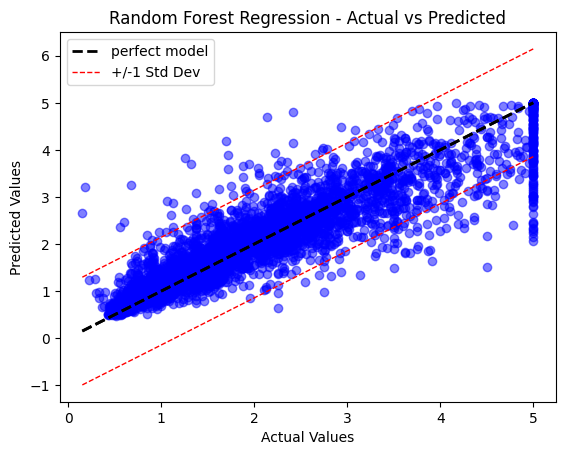

In [12]:
std_y = np.std(y_test)

plt.scatter(y_test, y_pred_test, alpha=0.5, color="blue")

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression - Actual vs Predicted")
plt.legend()
plt.show()

### Istogramma dell'errore residuo


Average error = -1068
Standard deviation of error = 51064


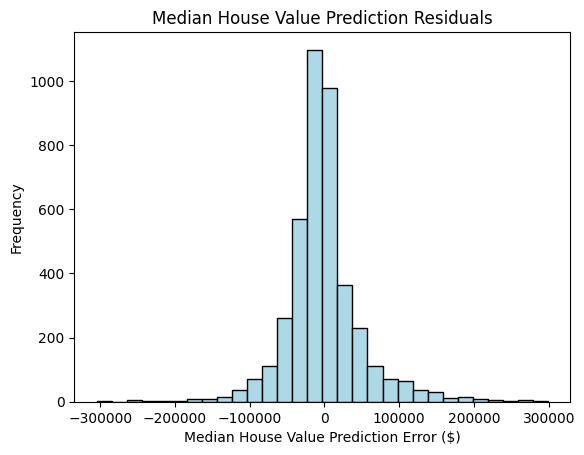

In [13]:
# Residual errors
residuals = 1e5*(y_test - y_pred_test)

plt.hist(residuals, bins=30, color='lightblue', edgecolor='black')
plt.title(f'Median House Value Prediction Residuals')
plt.xlabel('Median House Value Prediction Error ($)')
plt.ylabel('Frequency')
print('Average error = ' + str(int(np.mean(residuals))))
print('Standard deviation of error = ' + str(int(np.std(residuals))))



Distribuzione normale con una stdv di circa $50k


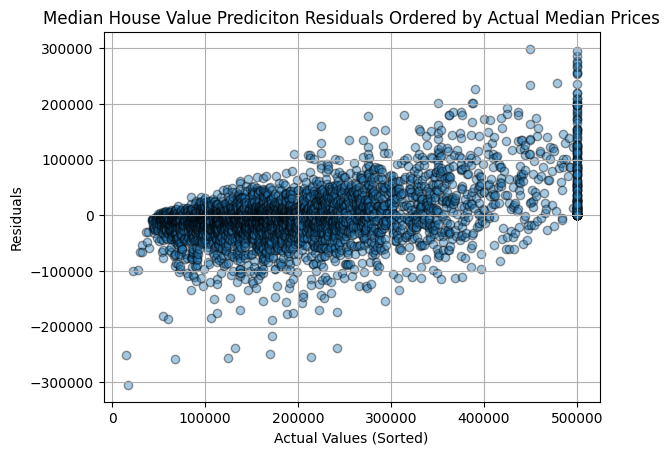

In [14]:
# Create a DataFrame to make sorting easy
residuals_df = pd.DataFrame({
    'Actual': 1e5*y_test,
    'Residuals': residuals
})

# Sort the DataFrame by the actual target values
residuals_df = residuals_df.sort_values(by='Actual')

# Plot the residuals
plt.scatter(residuals_df['Actual'], residuals_df['Residuals'], marker='o', alpha=0.4,ec='k')
plt.title('Median House Value Prediciton Residuals Ordered by Actual Median Prices')
plt.xlabel('Actual Values (Sorted)')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


Da questo grafico si può vedere che l’errore medio in funzione del prezzo mediano delle case in realtà aumenta, passando da valori negativi a positivi. In altre parole, i prezzi mediani più bassi tendono a essere sovrastimati, mentre quelli più alti tendono a essere sottostimati.

## Features importances con Random Forest



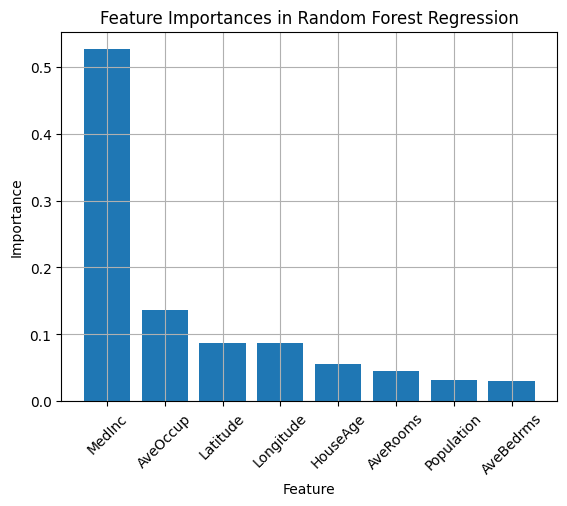

In [16]:
# Feature importances
importances = rf_regressor.feature_importances_
indices = np.argsort(importances)[::-1]
features = data.feature_names

# Plot feature importances
plt.bar(range(X.shape[1]), importances[indices],  align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances in Random Forest Regression")
plt.grid()
plt.show()

È logico che MedInc e i prezzi delle case siano correlati, quindi non sorprende che il reddito mediano sia la caratteristica più importante.



### Osservazioni

- Rispetto alla regressione lineare, la regressione con Random Forest è piuttosto robusta rispetto agli outlier e alle distribuzioni asimmetriche. Questo perché la random forest non fa alcuna assunzione sulla distribuzione dei dati, mentre la regressione lineare dà i migliori risultati con dati distribuiti normalmente.
- Non è necessario standardizzare i dati, come invece accade per algoritmi basati sulla distanza come KNN o SVM.


